In [1]:
import numpy as np
import pandas as pd
import sklearn.linear_model

import matplotlib.pyplot as plt
import seaborn as sns

import pickle

,Counts,coef,intercept,r1,r2
CP_GPe,9870,[[0.35212773695551025]],[0.11051856536736093],0.744317,0.554008
CP_SNr,3741,[[0.1528451853788297]],[0.26499667160955176],0.46521,0.21642
VPM,63190,[[1.8264661046253863]],[0.2742387171760936],0.681499,0.464441
VPL,3160,[[0.7820377726401845]],[0.6503265233995223],0.394025,0.155255
LGd,2850,[[0.5570890177623651]],[0.7424337430128916],0.321357,0.10327
MG,780,[[0.07931812199218986]],[0.4969216017127292],0.0964058,0.00929407


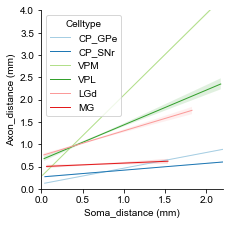

In [11]:
dist_df = None

groups = ['GPe', 'SNr','VPM', 'VPL', 'LGd', 'MG']
names = ['CP_GPe', 'CP_SNr','VPM', 'VPL', 'LGd', 'MG']
group_df = pd.DataFrame(index = names, columns=['Counts', 'coef', 'intercept', 'r1', 'r2'])

for i in range(len(groups)):
    [tp] = pickle.load(open('Soma_axon_distance_'+groups[i]+'_v2.pickle', 'rb'))
    tp['Celltype'] = names[i]
    tp = tp[tp['Soma_distance (mm)']>0.01]
    
    lm = sklearn.linear_model.LinearRegression()
    soma_dist = np.array(tp['Soma_distance (mm)']).reshape(-1,1)
    axon_dist = np.array(tp['Axon_distance (mm)']).reshape(-1,1)
    lm.fit(soma_dist, axon_dist)
    r = np.corrcoef(soma_dist.reshape(-1,), axon_dist.reshape(-1,))[0,1]
    r2 = lm.score(soma_dist, axon_dist)
    c1 = lm.coef_
    c2 = lm.intercept_
    group_df.loc[names[i]] = [len(tp), c1, c2, r, r2]
    
    if dist_df is None:
        dist_df = tp
    else:
        dist_df = pd.concat([dist_df, tp], axis=0)

g = sns.lmplot(x="Soma_distance (mm)", 
               y="Axon_distance (mm)",
                data=dist_df, 
                hue='Celltype',
               palette='Paired',
#                 x_bins=10,
               ci=95,
                order=1, 
               truncate=True,
               scatter=False,
               line_kws={'lw':1},
               height=3,
               legend_out=False
                )

g.set(xlim=(0, 2.2), ylim=(0,4))
g.savefig("../Figure/Soma_axon_distance_v2.pdf")
group_df

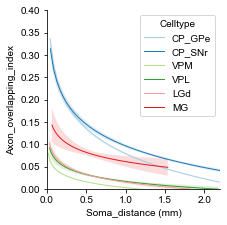

In [12]:
dist_df = None

for i in range(len(groups)):
    [tp] = pickle.load(open('Soma_axon_overlap_'+groups[i]+'_v2.pickle', 'rb'))
    tp['Celltype'] = names[i]
    tp = tp[tp['Soma_distance (mm)']>0.01]
    
    if dist_df is None:
        dist_df = tp
    else:
        dist_df = pd.concat([dist_df, tp], axis=0)

# fig, ax = plt.subplots(1,1, figsize=(7,7))

dist_df.rename(columns={'Axon_overlap':'Axon_overlapping_index'}, inplace=True)
g = sns.lmplot(x="Soma_distance (mm)", 
               y="Axon_overlapping_index",
                data=dist_df, 
                hue='Celltype',
               palette='Paired',
#                 x_bins=10,
               ci=95,
               logx=True,
                order=1, 
               truncate=True,
               scatter=False,
               line_kws={'lw':1},
               height=3,
               legend_out=False
                )

g.set(xlim=(0, 2.2), ylim=(-0.0, 0.4))
g.savefig("../Figure/Soma_axon_overlap_v2.pdf")
